# Quantstrat on CoCalc

https://github.com/braverock/quantstrat

Example below is a random one taken from their demo folder...

Loading required package: quantstrat



Loading required package: quantmod



Loading required package: xts



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Loading required package: TTR



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Loading required package: blotter



Loading required package: FinancialInstrument



Loading required package: PerformanceAnalytics




Attaching package: ‘PerformanceAnalytics’




The following object is masked from ‘package:graphics’:

    legend




Loading required package: foreach



[1] "USD"

[1] "IBM"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

[1] "bbands"

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "IBM"

[1] "2007-02-27 00:00:00 IBM 100 @ 89.827919"
[1] "2007-03-21 00:00:00 IBM -100 @ 91.166351"
[1] "2007-04-04 00:00:00 IBM -100 @ 91.978966"
[1] "2007-04-13 00:00:00 IBM 100 @ 90.755257"
[1] "2007-04-18 00:00:00 IBM -100 @ 90.630974"
[1] "2007-04-19 00:00:00 IBM 100 @ 90.143402"
[1] "2007-04-25 00:00:00 IBM -100 @ 96.998085"
[1] "2007-05-25 00:00:00 IBM 100 @ 100.554497"
[1] "2007-06-07 00:00:00 IBM 100 @ 97.323135"
[1] "2007-06-18 00:00:00 IBM -100 @ 100.697899"
[1] "2007-07-06 00:00:00 IBM -100 @ 104.235184"
[1] "2007-07-18 00:00:00 IBM -100 @ 106.19503"
[1] "2007-08-01 00:00:00 IBM 200 @ 107.112808"
[1] "2007-08-31 00:00:00 IBM -100 @ 111.558319"
[1] "2007-09-18 00:00:00 IBM 100 @ 111.500954"
[1] "2007-10-02 00:00:00 IBM -100 @ 113.154877"
[1] "2007-10-04 00:00:00 IBM 100 @ 110.602295"
[1] "2007-10-17 00:00:00 IBM -100 @ 110.688339"
[1] "2007-10-18 00:00:00 IBM 100 @ 109.751434"
[1] "2007-10-19 00:00:00 IBM 100 @ 107.342255"
[1] "2007-11-01 00:00:00 IBM -100 @ 108.652008"
[1] "2007-1

[1] "strat execution time:"


Time difference of 7.539834 secs


Warning message in .updatePosPL(Portfolio = pname, Symbol = as.character(symbol), :
“Could not parse ::2022-04-11 as ISO8601 string, or one/bothends of the range were outside the available prices: 2007-01-03/2022-04-08. Using all data instead.”


[1] "bbands"

[1] "updatePortf execution time:"


Time difference of 0.09082675 secs


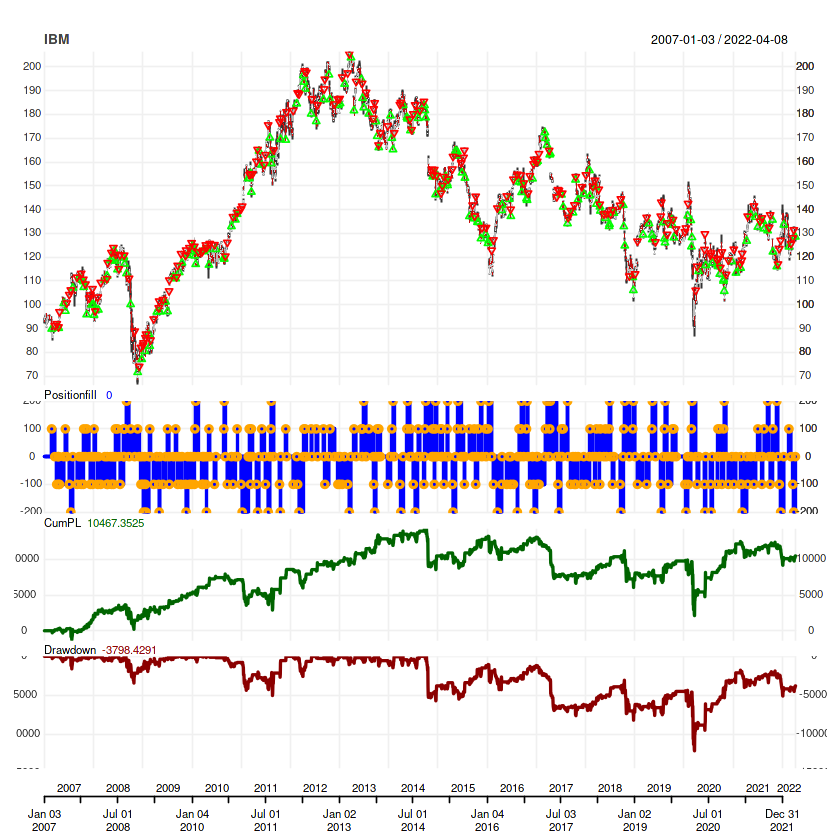

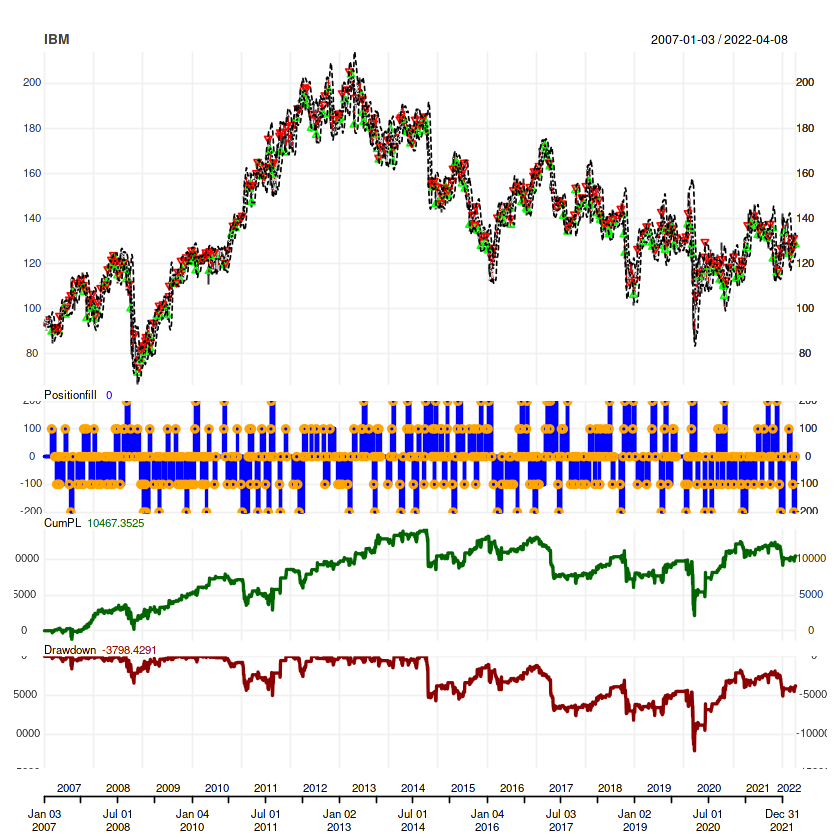

In [1]:
require(quantstrat)
suppressWarnings(rm("order_book.bbands",pos=.strategy))
suppressWarnings(rm("account.bbands","portfolio.bbands",pos=.blotter))
suppressWarnings(rm("account.st","portfolio.st","stock.str","stratBBands","startDate","initEq",'start_t','end_t'))

# some things to set up here
stock.str='IBM' # what are we trying it on

# we'll pass these 
SD = 2 # how many standard deviations, traditionally 2
N = 20 # how many periods for the moving average, traditionally 20


currency('USD')
stock(stock.str,currency='USD',multiplier=1)

startDate='2006-12-31'
initEq=1000000

portfolio.st='bbands'
account.st='bbands'

initPortf(portfolio.st, symbols=stock.str)
initAcct(account.st,portfolios='bbands')
initOrders(portfolio=portfolio.st)
addPosLimit(portfolio.st, stock.str, startDate, 200, 2 ) #set max pos

# set up parameters
maType='SMA'
n = 20
sdp = 2

strat.st<-portfolio.st
# define the strategy
strategy(strat.st, store=TRUE)

#one indicator
add.indicator(strategy = strat.st, 
              name = "BBands", 
              arguments = list(HLC = quote(HLC(mktdata)), 
                               n=n, 
                               maType=maType, 
                               sd=sdp 
                               ), 
              label='BBands')


#add signals:
add.signal(strategy = strat.st,
           name="sigCrossover",
           arguments = list(columns=c("Close","up"),
                            relationship="gt"),
           label="Cl.gt.UpperBand")

add.signal(strategy = strat.st,
           name="sigCrossover",
           arguments = list(columns=c("Close","dn"),
                            relationship="lt"),
           label="Cl.lt.LowerBand")

add.signal(strategy = strat.st,name="sigCrossover",
           arguments = list(columns=c("High","Low","mavg"),
                            relationship="op"),
           label="Cross.Mid")

# lets add some rules
add.rule(strategy = strat.st,name='ruleSignal',
         arguments = list(sigcol="Cl.gt.UpperBand",
                          sigval=TRUE,
                          orderqty=-100, 
                          ordertype='market',
                          orderside=NULL,
                          threshold=NULL,
                          osFUN=osMaxPos),
         type='enter')

add.rule(strategy = strat.st,name='ruleSignal',
         arguments = list(sigcol="Cl.lt.LowerBand",
                          sigval=TRUE,
                          orderqty= 100, 
                          ordertype='market',
                          orderside=NULL,
                          threshold=NULL,
                          osFUN=osMaxPos),
         type='enter')

add.rule(strategy = strat.st,name='ruleSignal',
         arguments = list(sigcol="Cross.Mid",
                          sigval=TRUE,
                          orderqty= 'all',
                          ordertype='market',
                          orderside=NULL,
                          threshold=NULL,
                          osFUN=osMaxPos),
         label='exitMid',
         type='exit')


#alternately, to exit at the opposite band, the rules would be...
#add.rule(strategy = strat.st,name='ruleSignal', arguments = list(data=quote(mktdata),sigcol="Lo.gt.UpperBand",sigval=TRUE, orderqty= 'all', ordertype='market', orderside=NULL, threshold=NULL),type='exit')
#add.rule(strategy = strat.st,name='ruleSignal', arguments = list(data=quote(mktdata),sigcol="Hi.lt.LowerBand",sigval=TRUE, orderqty= 'all', ordertype='market', orderside=NULL, threshold=NULL),type='exit')

#TODO add thresholds and stop-entry and stop-exit handling to test

getSymbols(stock.str,from=startDate,index.class=c('POSIXt','POSIXct'), src='yahoo')
start_t<-Sys.time()
out<-try(applyStrategy(strategy='bbands' , portfolios='bbands',parameters=list(sd=SD,n=N)) )

# look at the order book
#getOrderBook('bbands')
end_t<-Sys.time()
print("strat execution time:")
print(end_t-start_t)

start_t<-Sys.time()
updatePortf(Portfolio='bbands',Dates=paste('::',as.Date(Sys.time()),sep=''))
end_t<-Sys.time()
print("updatePortf execution time:")
print(end_t-start_t)

chart.Posn(Portfolio='bbands',Symbol=stock.str)
plot(add_BBands(on=1,sd=SD,n=N))